# PoleFigurePhaseFractions.ipynb
Written by Adam Creuziger (adam.creuziger@nist.gov)

Oct 2017

    This data was developed by employees of the National Institute of Standards and Technology (NIST), an agency of the Federal Government. Pursuant to title 17 United States Code Section 105, works of NIST employees are not subject to copyright protection in the United States and are considered to be in the public domain.

    The data is provided by NIST as a public service and is expressly provided "AS IS." NIST MAKES NO WARRANTY OF ANY KIND, EXPRESS, IMPLIED OR STATUTORY, INCLUDING, WITHOUT LIMITATION, THE IMPLIED WARRANTY OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE, NON-INFRINGEMENT AND DATA ACCURACY. NIST does not warrant or make any representations regarding the use of the data or the results thereof, including but not limited to the correctness, accuracy, reliability or usefulness of the data. NIST SHALL NOT BE LIABLE AND YOU HEREBY RELEASE NIST FROM LIABILITY FOR ANY INDIRECT, CONSEQUENTIAL, SPECIAL, OR INCIDENTAL DAMAGES (INCLUDING DAMAGES FOR LOSS OF BUSINESS PROFITS, BUSINESS INTERRUPTION, LOSS OF BUSINESS INFORMATION, AND THE LIKE), WHETHER ARISING IN TORT, CONTRACT, OR OTHERWISE, ARISING FROM OR RELATING TO THE DATA (OR THE USE OF OR INABILITY TO USE THIS DATA), EVEN IF NIST HAS BEEN ADVISED OF THE POSSIBILITY OF SUCH DAMAGES.

    To the extent that NIST may hold copyright in countries other than the United States, you are hereby granted the non-exclusive irrevocable and unconditional right to print, publish, prepare derivative works and distribute the NIST data, in any medium, or authorize others to do so on your behalf, on a royalty-free basis throughout the world.

    You may improve, modify, and create derivative works of the data or any portion of the data, and you may copy and distribute such modifications or works. Modified works should carry a notice stating that you changed the data and should note the date and nature of any such change. Please explicitly acknowledge the National Institute of Standards and Technology as the source of the data: Data citation recommendations are provided below.

    Permission to use this data is contingent upon your acceptance of the terms of this agreement and upon your providing appropriate acknowledgments of NIST's creation of the data.


See: https://www.nist.gov/director/licensing

In [82]:
import numpy as np
import pandas as pd
import scipy as scipy
from scipy import interpolate
from scipy import signal
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
#import mplstereonet
import math
import os
import glob
import statistics
import seaborn as sns



In [83]:
# Get the current working directory path
cwd=os.getcwd()
#print cwd
xpcdatapath=os.path.abspath(os.path.join(os.path.dirname( cwd)))
#print xpcdatapath
Folder=cwd+'/AveragedIntensites'

print (Folder)

#DFA=pd.read_excel((os.path.join(Folder, "alpha1F-HW20.xlsx"))

C:\Users\surya\Downloads\Mines Michael Cox XRD Study\Texture-Sampling-PhaseMeasurement-BiasErrors-master\JupyterNotebooks/AveragedIntensites


## Plot the effect of sample orientation and number of peaks (Fig 7)

C:\Users\surya\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: the 'skip_footer' keyword is deprecated, use 'skipfooter' instead
  
C:\Users\surya\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: the 'skip_footer' keyword is deprecated, use 'skipfooter' instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\surya\Anaconda3\lib\site-packages\ipykernel_launcher.py:95: FutureWarning: the 'skip_footer' keyword is deprecated, use 'skipfooter' instead
C:\Users\surya\Anaconda3\lib\site-packages\ipykernel_launcher.py:96: FutureWarning: the 'skip_footer' keyword is deprecated, use 'skipfooter' instead


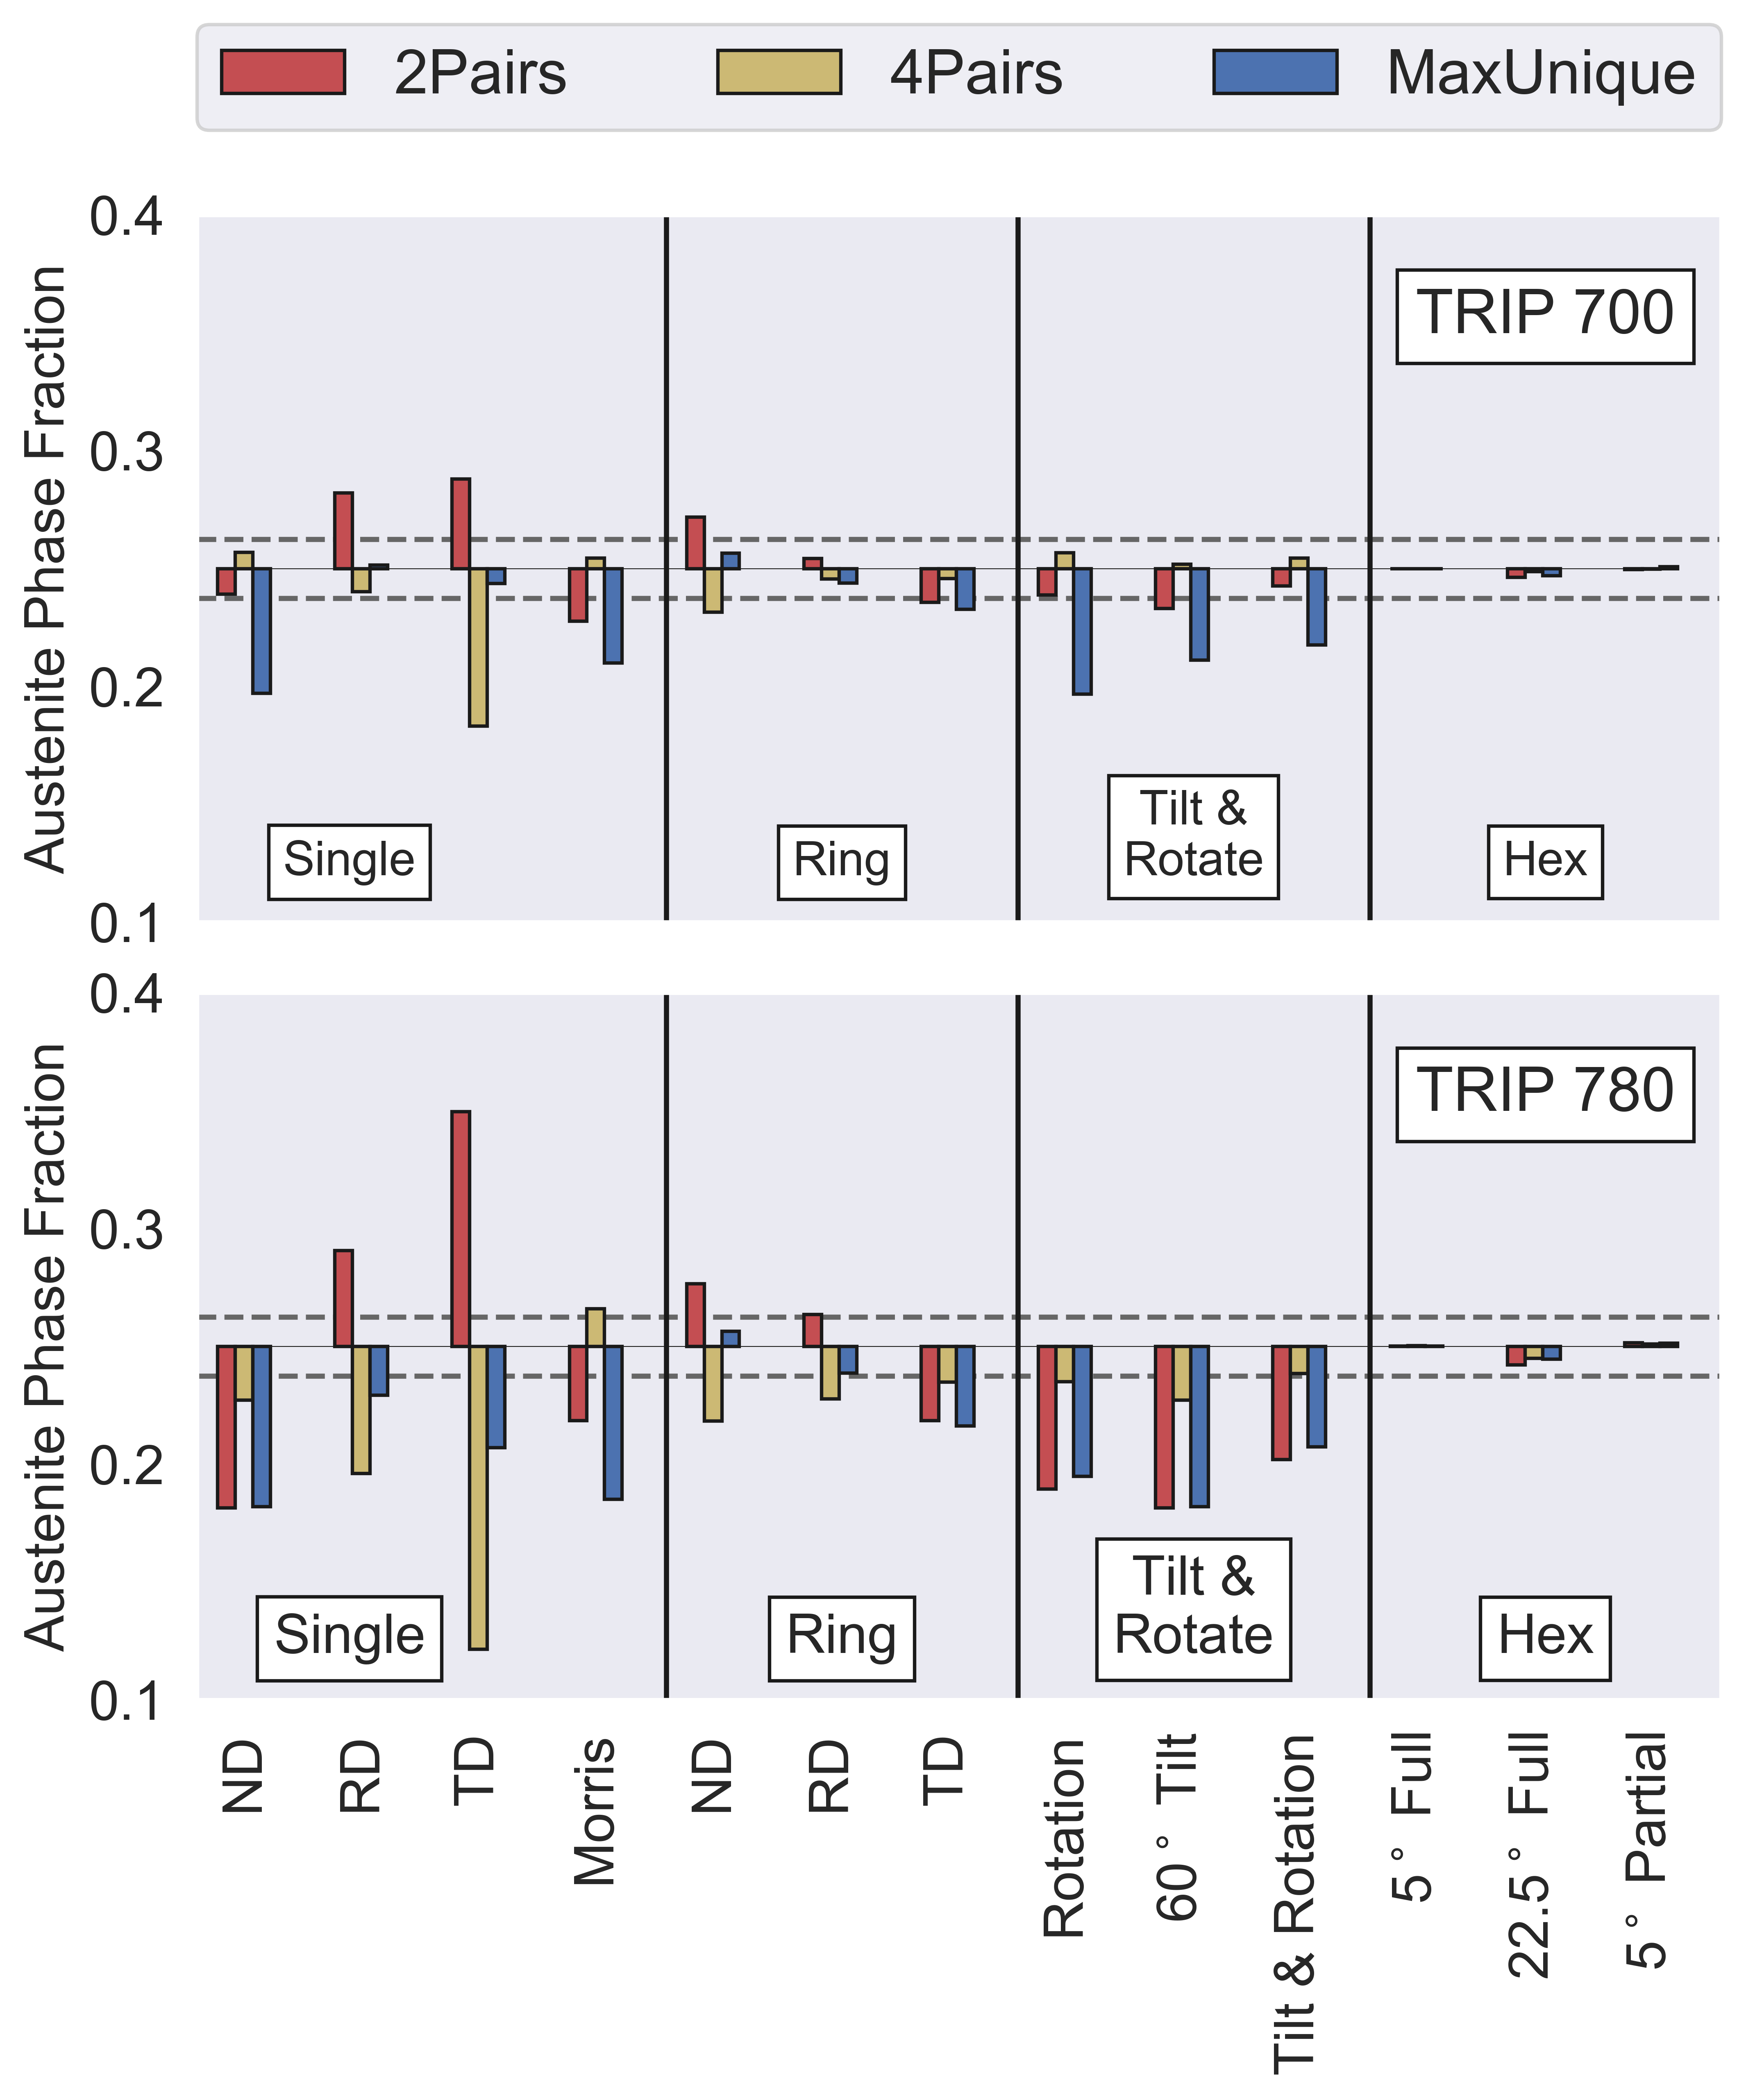

In [84]:

#read in the excel files with the averaged intensities
DFF=pd.read_excel((os.path.join(Folder,"TRIP700F.xlsx")),header=1,skip_footer=0)
DFA=pd.read_excel((os.path.join(Folder,"TRIP700A.xlsx")),header=1,skip_footer=0)

#Switch position of Tilt -row 7 and Rotate -row 8 data rows, matches Figure 4 better
#http://stackoverflow.com/questions/32929927/pandas-swap-rows-between-dataframes
tempF=DFF.loc[8]
DFF.loc[8,:]=DFF.loc[7,:].values
DFF.loc[7,:]=tempF.values

tempA=DFA.loc[8]
DFA.loc[8,:]=DFA.loc[7,:].values
DFA.loc[7,:]=tempA.values


VF=.25
tolerr=0.05


DF1=(VF*DFA["2Pairs"]/(VF*DFA["2Pairs"]+((1.0-VF)*DFF["2Pairs"])))-VF
DF2=(VF*DFA["4Pairs"]/(VF*DFA["4Pairs"]+((1.0-VF)*DFF["4Pairs"])))-VF
DF3=(VF*DFA["MaxUnique"]/(VF*DFA["MaxUnique"]+((1.0-VF)*DFF["MaxUnique"])))-VF



ind = np.arange(13)  # the x locations for the groups
width = 0.15       # the width of the bars

## Actually start plotting

fig = plt.figure(figsize=(8,8), dpi=600)

ax1 = fig.add_subplot(211)

#fig, ax = plt.subplots()
ax1.axhline(y=VF*(1+tolerr),color='.4',ls="--",zorder=1)
ax1.axhline(y=VF*(1-tolerr),color='.4',ls="--",zorder=1)

rects1 = ax1.bar(ind, DF1, width, bottom=.25, facecolor='r', edgecolor='k',zorder=4)
rects2 = ax1.bar(ind+width, DF2, width,bottom=.25, facecolor='y', edgecolor='k',zorder=4)
rects3 = ax1.bar(ind+2*width, DF3, width,bottom=.25, facecolor='b', edgecolor='k',zorder=4)

#tried as stem plot, but this doesn't work as well..
#rects1 = ax.stem(ind, DF1, linefmt='r-',markerfmt='rs')
#rects2 = ax.stem(ind+width,DF2, linefmt='y-',markerfmt='rs')
#rects3 = ax.stem(ind+2*width,DF3, linefmt='b-',markerfmt='rs')


ax1.plot([0, 12], [VF, VF], color='k', linestyle='-', linewidth=.25)

ax1.axvline(x=3.75,color='k')
ax1.axvline(x=6.75,color='k')
ax1.axvline(x=9.75,color='k')

# add some text for labels, title and axes ticks
ax1.set_ylabel('Austenite Phase Fraction',fontsize=16)
#ax1.set_title('Effect of Sampling on Measured Phase Fraction - TRIP 700')
ax1.set_xticks(ind + width)
ax1.xaxis.set_tick_params(labelsize=16)
ax1.yaxis.set_tick_params(labelsize=16)
# Fix the order
#ax.set_xticklabels(DFF['HKL'], rotation=90)
ax1.set_xticklabels(["","","","","","","","","","","","",""])
#ax1.set_xticklabels(["ND (Single)","<- RD ->","TD","Morris","ND","RD","TD","Rotation","60$^\circ$ Tilt",
#                    "Tilt & Rotation","5$^\circ$ Full",
#                    "22.5$^\circ$ Full","5$^\circ$ Partial",], rotation=90, va='center', y=-0.21)

#fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.1)


bbox_props = dict(boxstyle="square,pad=0.3", fc="white", ec="k", lw=1)
ax1.text(11.25, 0.35, "TRIP 700", bbox=bbox_props,  ha='center', fontsize=18)
ax1.text(1.05, 0.12, "Single", bbox=bbox_props,  ha='center', fontsize=14)
ax1.text(5.25, 0.12, "Ring", bbox=bbox_props,  ha='center', fontsize=14) 
ax1.text(11.25, 0.12, "Hex", bbox=bbox_props,  ha='center', fontsize=14) 
ax1.text(8.25, 0.12, "Tilt &\nRotate", bbox=bbox_props,  ha='center', fontsize=14) 


ax1.legend((rects1[0], rects2[0], rects3[0]), ('2Pairs', '4Pairs', 'MaxUnique'), 
          bbox_to_anchor=(0., 1.12, 1., .102), loc=3,
           ncol=3, mode="expand", borderaxespad=0.,fontsize=18)

ax1.set_ylim([VF-.15,VF+.15])
ax1.set_xlim([-.25, 12.75])

ax1.set_axisbelow(True)
plt.grid()

#plt.tight_layout()


#### Now for the second file

DFF=pd.read_excel((os.path.join(Folder,"TRIP780F.xlsx")),header=1,skip_footer=0)
DFA=pd.read_excel((os.path.join(Folder,"TRIP780A.xlsx")),header=1,skip_footer=0)

## Switch 


DF1=(VF*DFA["2Pairs"]/(VF*DFA["2Pairs"]+((1.0-VF)*DFF["2Pairs"])))-VF
DF2=(VF*DFA["4Pairs"]/(VF*DFA["4Pairs"]+((1.0-VF)*DFF["4Pairs"])))-VF
DF3=(VF*DFA["MaxUnique"]/(VF*DFA["MaxUnique"]+((1.0-VF)*DFF["MaxUnique"])))-VF

ind = np.arange(13)  # the x locations for the groups
width = 0.15       # the width of the bars

ax2 = fig.add_subplot(212)

ax2.axhline(y=VF*(1+tolerr),color='.4',ls="--",zorder=1)
ax2.axhline(y=VF*(1-tolerr),color='.4',ls="--",zorder=1)

rects1 = ax2.bar(ind, DF1, width, bottom=.25, facecolor='r', edgecolor='k',zorder=4)
rects2 = ax2.bar(ind+width, DF2, width,bottom=.25,  facecolor='y', edgecolor='k',zorder=4)
rects3 = ax2.bar(ind+2*width, DF3, width,bottom=.25,  facecolor='b', edgecolor='k',zorder=4)

ax2.plot([0, 12], [VF, VF], color='k', linestyle='-', linewidth=.25)

ax2.axvline(x=3.75,color='k')
ax2.axvline(x=6.75,color='k')
ax2.axvline(x=9.75,color='k')

# add some text for labels, title and axes ticks
ax2.set_ylabel('Austenite Phase Fraction', fontsize=16)
#ax2.set_title('Effect of Sampling on Measured Phase Fraction - TRIP 780')
ax2.set_xticks(ind + width)
ax2.xaxis.set_tick_params(labelsize=16)
ax2.yaxis.set_tick_params(labelsize=16)

#ax.set_xticklabels(DFF['HKL'], rotation=90)
#ax2.set_xticklabels(["","","","","","","","","","","","",""])
ax2.set_xticklabels(["ND","RD","TD","Morris","ND","RD","TD","Rotation","60$^\circ$ Tilt",
                     "Tilt & Rotation","5$^\circ$ Full",
                    "22.5$^\circ$ Full","5$^\circ$ Partial",], rotation=90)

bbox_props = dict(boxstyle="square,pad=0.3", fc="white", ec="k", lw=1)
ax2.text(11.25, 0.35, "TRIP 780", bbox=bbox_props,  ha='center', fontsize=18)
ax2.text(1.05, 0.12, "Single", bbox=bbox_props,  ha='center', fontsize=16)
ax2.text(5.25, 0.12, "Ring", bbox=bbox_props,  ha='center', fontsize=16) 
ax2.text(11.25, 0.12, "Hex", bbox=bbox_props,  ha='center', fontsize=16) 
ax2.text(8.25, 0.12, "Tilt &\nRotate", bbox=bbox_props,  ha='center', fontsize=16) 


#ax2.legend((rects1[0], rects2[0], rects3[0]), ('2Pairs', '4Pairs', 'MaxUnique'), 
#          bbox_to_anchor=(0., 1.12, 1., .102), loc=3,
#           ncol=3, mode="expand", borderaxespad=0.)

ax2.set_ylim([VF-.15,VF+.15])
ax2.set_xlim([-.25, 12.75])

ax2.set_axisbelow(True)
plt.grid()


# Remove comments to save files
#plt.savefig("ExampleTex-Draft.pdf",dpi=600,format="pdf",orientation='portrait',bbox_inches='tight')
#plt.savefig("ExampleTex-Draft.eps",dpi=600,format="eps",orientation='portrait',bbox_inches='tight')
plt.savefig("ExampleTex-Draft.png",dpi=600,format="png",orientation='portrait',bbox_inches='tight')
plt.show()



# Figure 8: Plot Combinations of different textures

In [85]:
# Get the current working directory path
cwd=os.getcwd()
#print cwd
xpcdatapath=os.path.abspath(os.path.join(os.path.dirname( cwd)))
#print xpcdatapath
Folder=cwd+'/AveragedIntensites'

print (Folder)

C:\Users\surya\Downloads\Mines Michael Cox XRD Study\Texture-Sampling-PhaseMeasurement-BiasErrors-master\JupyterNotebooks/AveragedIntensites


## Search for HW20 files

In [187]:
import fnmatch



# Set Volume Fraction
VF=.25

#Read in Texture files matching HW of 20 degrees
AusteniteTextures=[]
FerriteTextures=[]  


for file in os.listdir(Folder):
    if fnmatch.fnmatch(file, '*A-HW20*'):
        #print file
        AusteniteTextures.append(file)
    elif fnmatch.fnmatch(file, '*F-HW20*'):
        FerriteTextures.append(file)
    else: ()
        
#print FerriteTextures
#print AusteniteTextures

# create a dataframe shape from existing data
DFA=pd.read_excel((os.path.join(Folder, "alpha1F-HW20.xlsx")),header=1,skip_footer=0)

#copy the HKL reflection indexes
df2pair=DFA["HKL"]
df4pair=DFA["HKL"]
dfMaxUnique=DFA["HKL"]

for AustOrient in AusteniteTextures:
    for FerrOrient in FerriteTextures:
        

        DFF=pd.read_excel(os.path.join(Folder,FerrOrient),header=1,skip_footer=0)
        DFA=pd.read_excel(os.path.join(Folder,AustOrient),header=1,skip_footer=0)

        #Switch position of Tilt -row 7 and Rotate -row 8 data rows, matches Figure 4 better
        #http://stackoverflow.com/questions/32929927/pandas-swap-rows-between-dataframes
        tempF=DFF.loc[8]
        DFF.loc[8,:]=DFF.loc[7,:].values
        DFF.loc[7,:]=tempF.values

        tempA=DFA.loc[8]
        DFA.loc[8,:]=DFA.loc[7,:].values
        DFA.loc[7,:]=tempA.values
        
        #print (DFF)
        #print (DFA)
        
        # add minus VF for plotting
        DF1=(VF*DFA["2Pairs"]/(VF*DFA["2Pairs"]+((1.0-VF)*DFF["2Pairs"])))#-VF
        DF2=(VF*DFA["4Pairs"]/(VF*DFA["4Pairs"]+((1.0-VF)*DFF["4Pairs"])))#-VF
        DF3=(VF*DFA["MaxUnique"]/(VF*DFA["MaxUnique"]+((1.0-VF)*DFF["MaxUnique"])))#-VF
        
        Fname=FerrOrient.split(".")
        Aname=AustOrient.split(".")
        
        MixName= Fname[0]+"-"+Aname[0]
        
        #print DF1, DF2, DF3
        
        data1 = pd.DataFrame({MixName: DF1})
        data2 = pd.DataFrame({MixName: DF2})
        data3 = pd.DataFrame({MixName: DF3})
        
        
        
        df2pair = pd.concat([df2pair, data1], axis=1)
        df4pair = pd.concat([df4pair, data2], axis=1)
        dfMaxUnique = pd.concat([dfMaxUnique, data3], axis=1)
        
print (df2pair)

#TexNames=list(df2pair.columns.values)
#TexNames[1:]
#print list(df[TexNames[0]])
#df1[TexNames[0]]
#print list(df2pair.columns.values)


C:\Users\surya\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: the 'skip_footer' keyword is deprecated, use 'skipfooter' instead
C:\Users\surya\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: FutureWarning: the 'skip_footer' keyword is deprecated, use 'skipfooter' instead
C:\Users\surya\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: FutureWarning: the 'skip_footer' keyword is deprecated, use 'skipfooter' instead


                            HKL  alpha1F-HW20-BetaFiberA-HW20  \
0                     ND Single                      0.145852   
1                     RD Single                      0.261194   
2                     TD Single                      0.246411   
3                        Morris                      0.306686   
4      Ring Perpendicular to ND                      0.204107   
5      Ring Perpendicular to RD                      0.245727   
6      Ring Perpendicular to TD                      0.217658   
7          NoRotation-tilt60deg                      0.145402   
8               Rotation-NoTilt                      0.172386   
9            Rotation-60detTilt                      0.180099   
10     HexGrid-90degTilt5degRes                      0.249824   
11  HexGrid-90degTilt22p5degRes                      0.254621   
12     HexGrid-60degTilt5degRes                      0.266283   

    alpha2F-HW20-BetaFiberA-HW20  alpha3F-HW20-BetaFiberA-HW20  \
0                      

C:\Users\surya\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: the 'skip_footer' keyword is deprecated, use 'skipfooter' instead
C:\Users\surya\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: FutureWarning: the 'skip_footer' keyword is deprecated, use 'skipfooter' instead
C:\Users\surya\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: FutureWarning: the 'skip_footer' keyword is deprecated, use 'skipfooter' instead


AxesSubplot(0.304583,0.125;0.440417x0.755)


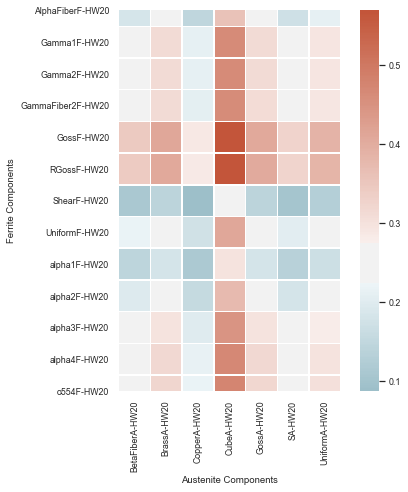

In [175]:
def PlotHeatmap(hw,PeakCombo,Scheme):
    import fnmatch
    HW=str(hw)

    VF=.25


    
    AusteniteTextures=[]
    FerriteTextures=[]  


    for file in os.listdir(Folder):
    
        if (file.find("A-HW"+HW)>0):
            AusteniteTextures.append(file)
        elif (file.find("F-HW"+HW)>0):
            FerriteTextures.append(file)
        else: ()
        
        #print FerriteTextures
        #print AusteniteTextures

    # create a dataframe shape from existing data
    DFA=pd.read_excel((os.path.join(Folder, FerriteTextures[0])),header=1,skip_footer=0)
    

    #copy the HKL reflection indexes
    df2pair=DFA["HKL"]
    df4pair=DFA["HKL"]
    dfMaxUnique=DFA["HKL"]
    

    for AustOrient in AusteniteTextures:
        for FerrOrient in FerriteTextures:
        
            
            DFF=pd.read_excel(os.path.join(Folder,FerrOrient),header=1,skip_footer=0)
            DFA=pd.read_excel(os.path.join(Folder,AustOrient),header=1,skip_footer=0)

            #Switch position of Tilt -row 7 and Rotate -row 8 data rows, matches Figure 4 better
            #http://stackoverflow.com/questions/32929927/pandas-swap-rows-between-dataframes
            tempF=DFF.loc[8]
            DFF.loc[8,:]=DFF.loc[7,:].values
            DFF.loc[7,:]=tempF.values

            tempA=DFA.loc[8]
            DFA.loc[8,:]=DFA.loc[7,:].values
            DFA.loc[7,:]=tempA.values
        
            #print (DFF)
            #print (DFA)
        
            # add minus VF for plotting
            DF1=(VF*DFA["2Pairs"]/(VF*DFA["2Pairs"]+((1.0-VF)*DFF["2Pairs"])))#-VF
            DF2=(VF*DFA["4Pairs"]/(VF*DFA["4Pairs"]+((1.0-VF)*DFF["4Pairs"])))#-VF
            DF3=(VF*DFA["MaxUnique"]/(VF*DFA["MaxUnique"]+((1.0-VF)*DFF["MaxUnique"])))#-VF
        
            Fname=FerrOrient.split(".")
            Aname=AustOrient.split(".")
        
            MixName= Fname[0]+"-"+Aname[0]
        
            
        
            data1 = pd.DataFrame({MixName: DF1})
            data2 = pd.DataFrame({MixName: DF2})
            data3 = pd.DataFrame({MixName: DF3})
        
            
        
            df2pair = pd.concat([df2pair, data1], axis=1)
            df4pair = pd.concat([df4pair, data2], axis=1)
            dfMaxUnique = pd.concat([dfMaxUnique, data3], axis=1)
        
    if(PeakCombo.lower()=='df2'):
        data=df2pair
    elif (PeakCombo.lower()=='df4'):
        data=df4pair
    else:
        data=dfMaxUnique
    
    
    
    for i in range (len(data.iloc[:,0])):
        if (data.iloc[:,0][i].lower()==Scheme.lower()):
            break
    
    names=[]
    
    for j in range (len(data.columns.to_numpy())):
        names.append(data.columns.to_numpy()[j])
    names=np.delete(names,0)
    
    values=[]
    for k in range (len(data.columns.to_numpy())):
        values.append(data.iloc[i,k])
    values=np.delete(values,0)
    
    
    fraction=pd.DataFrame(data=values,columns=['Phase Fraction'])
    Fnames=[]
    Anames=[]
    for name in names:
        index=name.find(HW)+2
        Fnames.append(name[:index])
        Anames.append(name[index+1:])
    Ferrite=pd.DataFrame(data=Fnames,columns=['Ferrite Component'])
    Austenite=pd.DataFrame(data=Anames,columns=['Austenite Component'])
    components=pd.concat([Ferrite,Austenite],axis=1)
    relevantdata=pd.concat([components, fraction],axis=1)
    xaxis=np.unique(Ferrite.to_numpy())
    yaxis=np.unique(Austenite.to_numpy())
    array=np.ndarray(shape=(len(yaxis),len(xaxis)))
    
    
    k=0
    for i in range (len(yaxis)):
        for j in range (len(xaxis)):
            array[i,j]=values[k]
            k=k+1
    
    #print(array)    
    values[values == ''] = 0.0
    Values = values.astype(np.float)  
    
               
    
    df=pd.DataFrame({'Austenite Components': Anames, 'Ferrite Components': Fnames, 'Phase Fraction': Values })
 
    # plotting
    df_wide=df.pivot_table( index='Ferrite Components', columns='Austenite Components', values='Phase Fraction' )
    color= sns.diverging_palette(220, 20, sep=20, as_cmap=True)
    figure=sns.heatmap( df_wide, cmap=color,center=0.25,linewidths=0.5,square=True)
    return figure
  


print(PlotHeatmap(20,"dF2","ND Single"))

In [61]:
print(PlotHeatmap(20,"dF2","ND Single"))

C:\Users\surya\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: the 'skip_footer' keyword is deprecated, use 'skipfooter' instead
C:\Users\surya\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: FutureWarning: the 'skip_footer' keyword is deprecated, use 'skipfooter' instead
C:\Users\surya\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: FutureWarning: the 'skip_footer' keyword is deprecated, use 'skipfooter' instead


                          Components       Phase Fraction
0       alpha1F-HW20-BetaFiberA-HW20  0.14585152838427948
1       alpha2F-HW20-BetaFiberA-HW20  0.19555035128805623
2       alpha3F-HW20-BetaFiberA-HW20  0.24558823529411763
3       alpha4F-HW20-BetaFiberA-HW20    0.262992125984252
4   AlphaFiberF-HW20-BetaFiberA-HW20  0.18392070484581496
..                               ...                  ...
86          GossF-HW20-UniformA-HW20   0.3883495145631068
87          o554F-HW20-UniformA-HW20  0.30349013657056145
88         RGossF-HW20-UniformA-HW20   0.3861003861003861
89         ShearF-HW20-UniformA-HW20   0.1310615989515072
90       UniformF-HW20-UniformA-HW20                 0.25

[91 rows x 2 columns]


## Plot 

AttributeError: 'Series' object has no attribute 'columns'

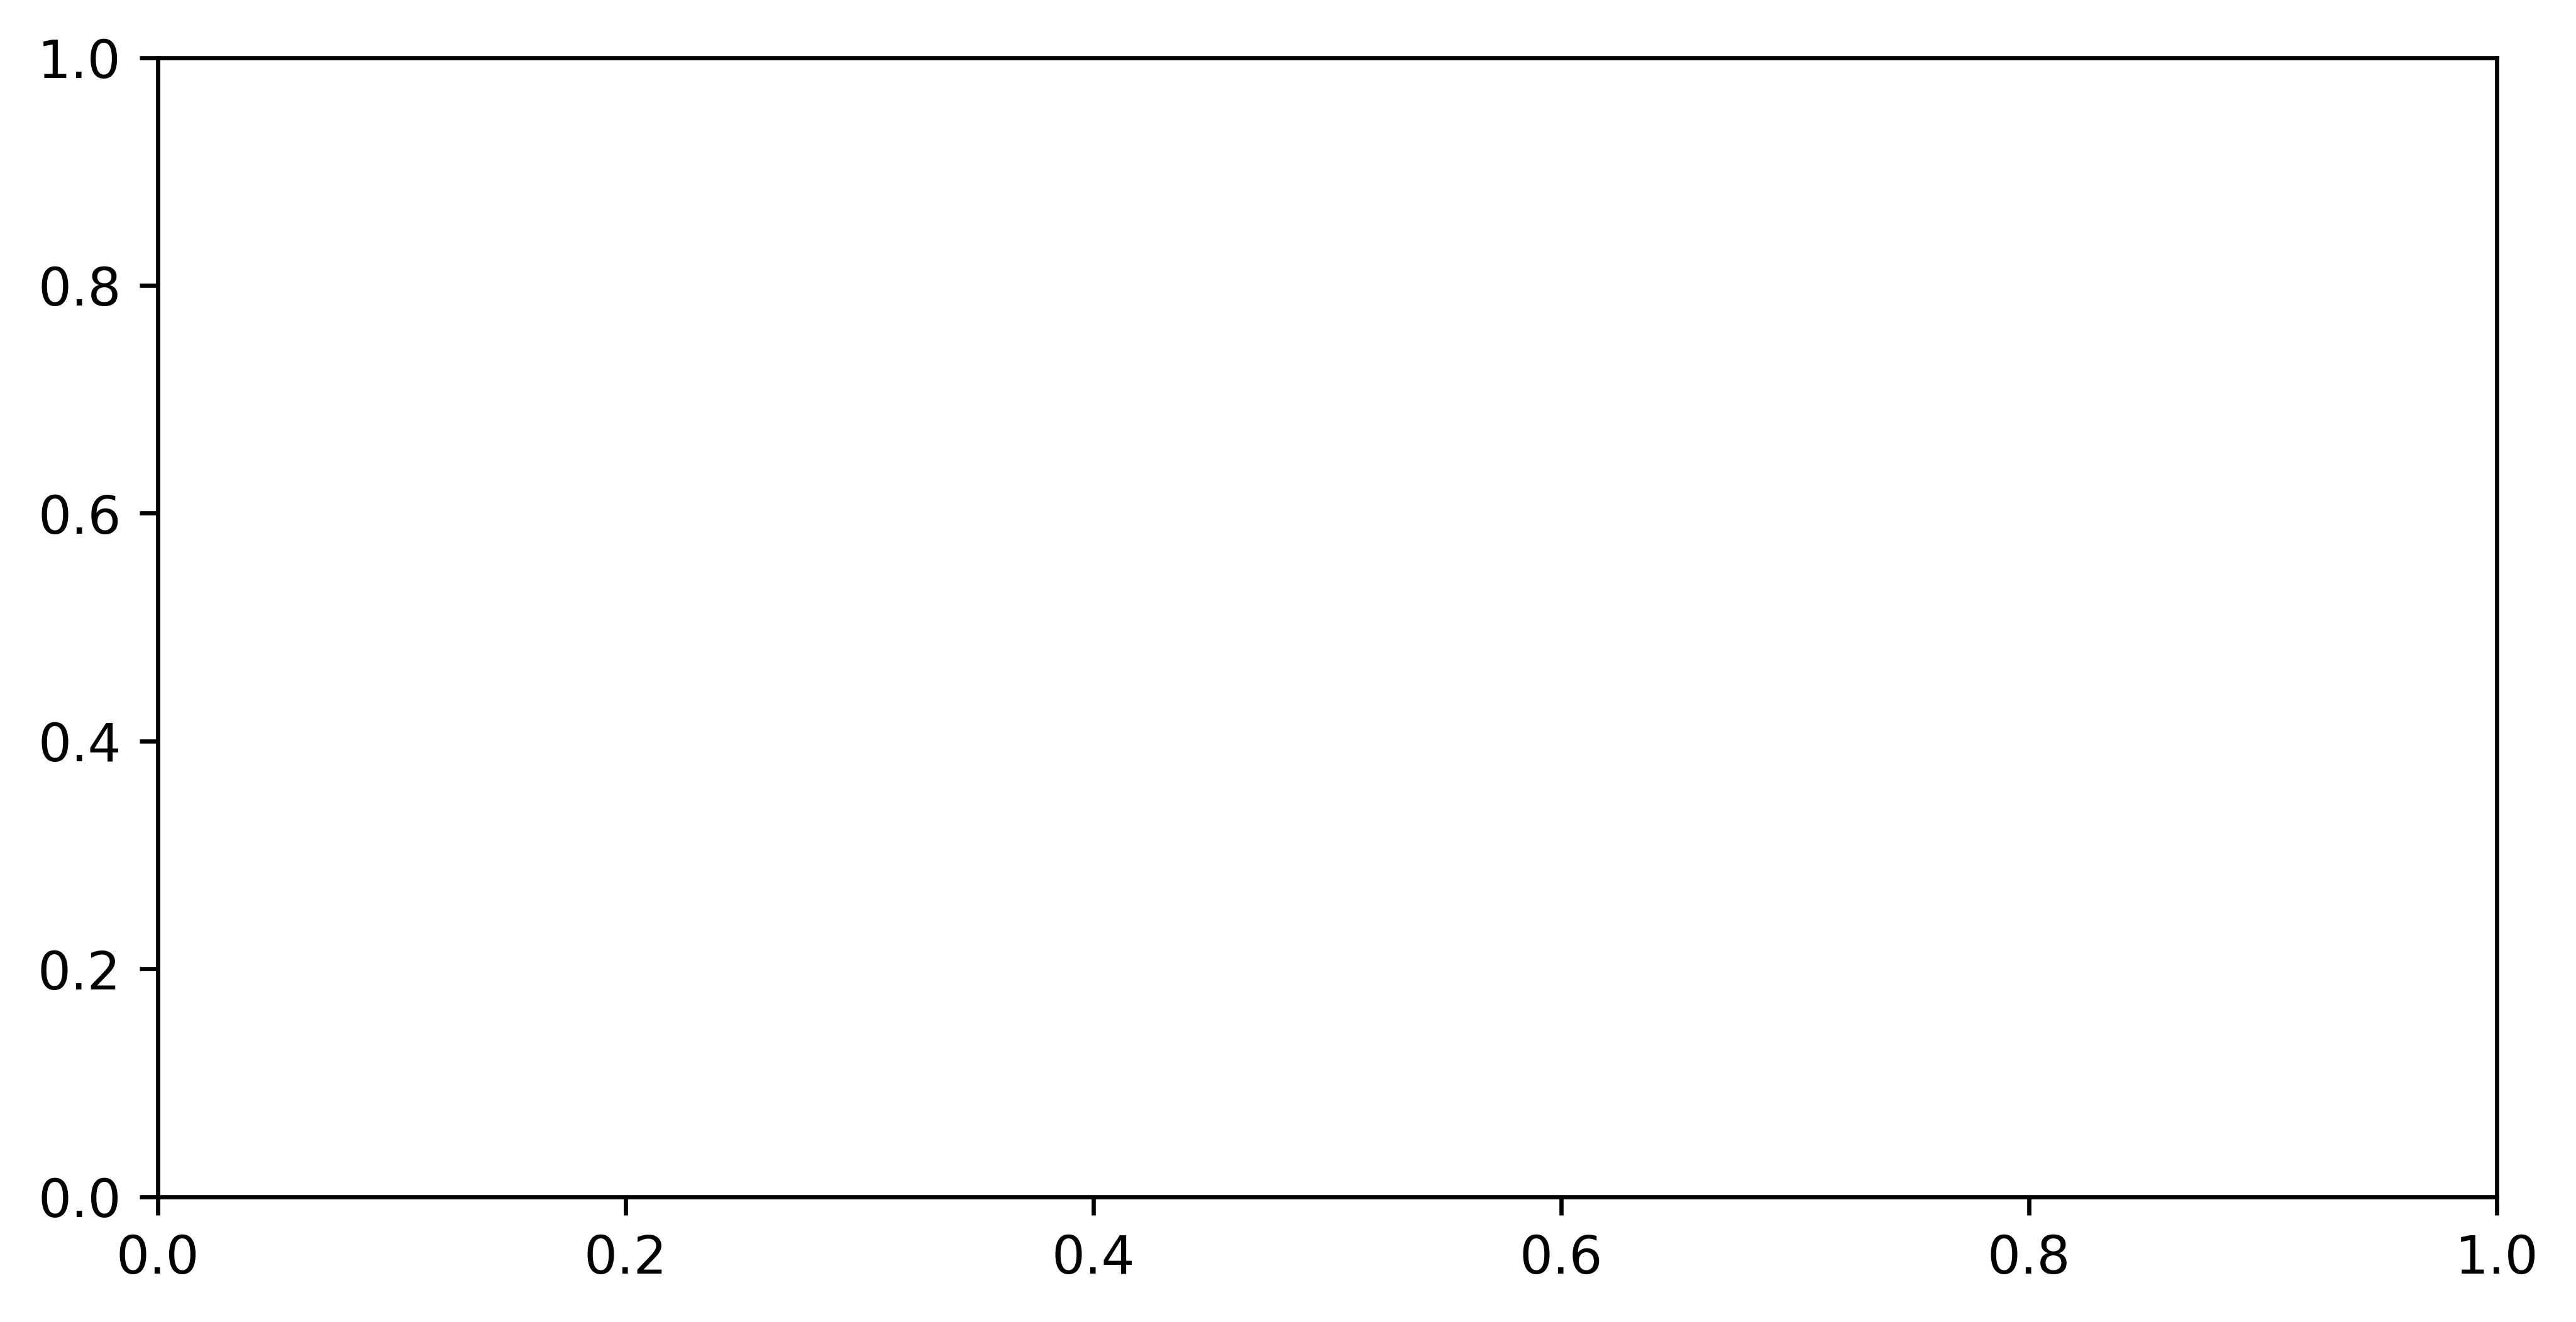

In [10]:
fig, ax = plt.subplots(figsize=(8,4), dpi=600)

#list of textures
TexNames=list(df2pair.columns.values)

#list of sampling methods
SamplingMethods=list(df2pair[TexNames[0]])

elem=np.arange(len(TexNames[1:]))


#for each sampling method
for i, item in enumerate(df2pair[TexNames[0]]):
    #print i
    #print item
    #Row slice from dataframe, without name
    #print list(df.ix[i])[1:]

    
    #print len(elem),len(list(df1.ix[i])[1:])
    #elem.fill(i)
    if i==0:
        #scatter1=ax.scatter(np.full(elem.shape, i-0.15) ,  list(df2pair.ix[i])[1:] ,
        #                    edgecolors='r',label="2Pair", s=10, alpha=1, marker="o",facecolors='none')
        scatter1=ax.scatter(np.full(elem.shape, i-0.15) ,  list(df2pair.ix[i])[1:] ,
                            color='r',label="2Pairs", s=18, alpha=0.33,marker='o',zorder=4)
        scatter2=ax.scatter(np.full(elem.shape, i) ,  list(df4pair.ix[i])[1:] ,
                            color='y',label="4Pairs", s=18, alpha=0.33, marker='o',zorder=4)
        scatter3=ax.scatter(np.full(elem.shape, i+0.15) ,  list(dfMaxUnique.ix[i])[1:] ,
                            color='b',label="MaxUnique", s=18, alpha=0.33, marker='o',zorder=4)
    else:
        scatter1=ax.scatter(np.full(elem.shape, i-0.15) ,  list(df2pair.ix[i])[1:] ,
                            color='r',label="", s=18, alpha=0.33,marker='o',zorder=4)
        scatter2=ax.scatter(np.full(elem.shape, i) ,  list(df4pair.ix[i])[1:] ,
                            color='y',label="", s=18, alpha=0.33, marker='o',zorder=4)
        scatter3=ax.scatter(np.full(elem.shape, i+0.15) ,  list(dfMaxUnique.ix[i])[1:] ,
                            color='b',label="", s=18, alpha=0.33, marker='o',zorder=4)
        #elem.fill(i)   
    
    
ax.legend(bbox_to_anchor=(0., 1.12, 1., .102), loc=3, ncol=3, mode="expand", borderaxespad=0.,fontsize=18)

ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)

#plt.xticks(np.arange(len(SamplingMethods)),SamplingMethods, rotation=90)

bbox_props = dict(boxstyle="square,pad=0.3", fc="white", ec="k", lw=1)
ax.text(2.75, 0.05, "Single", bbox=bbox_props,  ha='center',fontsize=14)
ax.text(5.0, 0.05, "Ring", bbox=bbox_props,  ha='center',fontsize=14) 
ax.text(11.0, 0.05, "Hex", bbox=bbox_props,  ha='center',fontsize=14) 
ax.text(8.5, 0.025, "Tilt &\nRotate", bbox=bbox_props,  ha='center',fontsize=14) 

plt.xticks(np.arange(len(SamplingMethods)),["ND","RD","TD","Morris","ND","RD","TD",
                                             "Rotation","60$^\circ$ Tilt", "Tilt & Rotation",
                                           "5$^\circ$ Full","22.5$^\circ$ Full","5$^\circ$ Partial"], rotation=90,
                                           fontsize=16)

#ax.set_xticklabels(["ND","RD","TD","Morris","ND","RD","TD","5$^\circ$ Full",
                 #   "22.5$^\circ$ Full","5$^\circ$ Partial","60$^\circ$ Tilt", "Rotation", "Tilt & Rotation"], rotation=90)


#ax.plot([-1, 13], [VF, VF], color='k', linestyle='-', linewidth=.5)
ax.axhline(y=VF,color='k',ls="-",zorder=5)
ax.axhline(y=VF*(1+tolerr),color='.4',ls="--",zorder=1)
ax.axhline(y=VF*(1-tolerr),color='.4',ls="--",zorder=1)


ax.axvline(x=3.5,color='k')
ax.axvline(x=6.5,color='k')
ax.axvline(x=9.5,color='k')

ax.set_axisbelow(True)
plt.grid()
ax.set_ylabel('Austenite Phase Fraction', fontsize=16)
#ax.set_title('Effect of Texture Combinations')
ax.set_xlim([-.5, 12.5])

# Remove comments to save files
#plt.savefig("TextureCombinations-Draft.pdf", dpi=600,format="pdf",orientation='portrait',bbox_inches='tight')
#plt.savefig("TextureCombinations-Draft.eps",dpi=600,format="eps",orientation='portrait',bbox_inches='tight')
plt.savefig("TextureCombinations-Draft.png",dpi=600,format="png",orientation='portrait',bbox_inches='tight')
plt.show()


## Table 2: Save the number of combinations within the ±5% range
- Attempted to plot the median and as a histograms, but a table seems to be a better method
- Plot commands are commented out
- The median value shows some skew to the bias errors, but this table was not deemed to add sufficently to the paper.

In [9]:

#VF=0.25
AcceptRange=0.05

#fig, ax = plt.subplots(figsize=(8,4), dpi=600)

#list of textures
TexNames=list(df2pair.columns.values)

#list of sampling methods
SamplingMethods=list(df2pair[TexNames[0]])

elem=np.arange(len(TexNames[1:]))


#sales = [('Nothing', 0, 0, 0)]
labels = ['Scheme', '2peaks', '4peaks', 'MaxUnique']

#print dfMedian
#dfinRange

#for each sampling method
for i, item in enumerate(df2pair[TexNames[0]]):
    #print i
    #print item
    #Row slice from dataframe, without name
    #print list(df.ix[i])[1:]
    
    a=statistics.median(list(df2pair.ix[i])[1:] )
    b=statistics.median(list(df4pair.ix[i])[1:] )
    c=statistics.median(list(dfMaxUnique.ix[i])[1:])
 
    df2inRange=sum(VF*(1-AcceptRange) <= x <= VF*(1+AcceptRange) for x in (df2pair.ix[i])[1:])
    df4inRange=sum(VF*(1-AcceptRange) <= x <= VF*(1+AcceptRange) for x in (df4pair.ix[i])[1:])
    dfMaxUniqueinRange=sum(VF*(1-AcceptRange) <= x <= VF*(1+AcceptRange) for x in (dfMaxUnique.ix[i])[1:])
    
    if i==0:    
        dfMedian=pd.DataFrame.from_records([(item, a, b, c)], columns=labels)
        dfinRange=pd.DataFrame.from_records([(item, df2inRange, df4inRange, dfMaxUniqueinRange)], columns=labels)
    else:  
        #print list([item, a, b, c])
        dfMedianI=pd.DataFrame.from_records([(item, a, b, c)], columns=labels)
        dfinRangeI=pd.DataFrame.from_records([(item, df2inRange, df4inRange, dfMaxUniqueinRange)], columns=labels)
        #dfMedian = pd.DataFrame.from_records(sales, columns=labels)    
        dfMedian=dfMedian.append(dfMedianI, ignore_index=True)
        dfinRange=dfinRange.append(dfinRangeI, ignore_index=True)
    
    #print len(list(df2pair.ix[i])[1:])

    #print item, df2inRange, df4inRange, dfMaxUniqueinRange
    
    #print len(elem),len(list(df1.ix[i])[1:])
    #elem.fill(i)

        #scatter1=ax.scatter(np.full(elem.shape, i-0.15) ,  list(df2pair.ix[i])[1:] ,
        #                    edgecolors='r',label="2Pair", s=10, alpha=1, marker="o",facecolors='none')
        #scatter1=ax.hist(  list(df2pair.ix[i])[1:] , bins,
        #                    color='r',label="2Pair",alpha=0.33)
        #scatter2=ax.hist(  list(df4pair.ix[i])[1:] , bins,
        #                    color='y',label="4Pair",alpha=0.33)
        #scatter3=ax.hist(  list(dfMaxUnique.ix[i])[1:] , bins,
        #                    color='b',label="MaxUnique",alpha=0.33)


print dfMedian
print dfinRange

# Comment out to save tables
#dfMedian.to_csv("MedianTable.csv")
#dfinRange.to_csv("InRangeTable.csv")



#ax.axvline(x=.25,color='k',ls="dashed")
#ax.axvline(x=.25+0.0125,color='c',ls="dashed")
#ax.axvline(x=.25-0.0125,color='c',ls="dashed")
#plt.grid()
#ax.set_ylabel('Number of Cases')
#ax.set_title('Effect of Texture Combinations')
#ax.set_xlim([0, 1])
#ax.set_xlim([.23, .27])

#plt.savefig("TextureCombinations-Draft.pdf", dpi=600,format="pdf",orientation='portrait',bbox_inches='tight')
#plt.savefig("TextureCombinations-Draft.eps",dpi=600,format="eps",orientation='portrait',bbox_inches='tight')
#plt.show()

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(dfMedian)? (<ipython-input-9-d50fec0e139c>, line 64)

## Plot Effect of Texture Intensity (Fig 9)

In [7]:
# Get the current working directory path
cwd=os.getcwd()
#print cwd
xpcdatapath=os.path.abspath(os.path.join(os.path.dirname( cwd)))
#print xpcdatapath
Folder=cwd+'/AveragedIntensites'

#print Folder


## Retreive texture index file

In [6]:
# Get the current working directory path
cwd=os.getcwd()
#print cwd
xpcdatapath=os.path.abspath(os.path.join(os.path.dirname( cwd)))
#print xpcdatapath
TIfile=xpcdatapath+'/Matlab/MtexData/ComputedTextureIndexValues.txt'

#print TIfile


### Diagnostics to check file status

In [19]:
#read in TIfile

TextureIndexes=pd.read_table(TIfile)
#print TextureIndexes

#strip whitespace
TextureIndexes.columns=TextureIndexes.columns.str.strip()

#TextureIndexes.loc[TextureIndexes['Name'] == 'Uniform']

TI=TextureIndexes[TextureIndexes['Name'].str.contains("SA-HW10")].as_matrix()



#TI=HW10[HW10['Name'].str.contains("SA")]["TI"].as_matrix()
#print TI

C:\Users\surya\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


In [5]:
DFF=pd.read_excel((os.path.join(Folder, "ShearF-HW40.xlsx")),header=1,skip_footer=0)
DFA=pd.read_excel((os.path.join(Folder, "CubeA-HW40.xlsx")),header=1,skip_footer=0)
DFF

#[0] is the ND Single Row
#print 


if (((DFF["[2, 1, 1]"][0]/DFF["[2, 0, 0]"][0])>=0.869) and ((DFF["[2, 1, 1]"][0]/DFF["[2, 0, 0]"][0])<=1.195)):
    print True, DFF["[2, 1, 1]"][0]/DFF["[2, 0, 0]"][0]
else:
    print False, DFF["[2, 1, 1]"][0]/DFF["[2, 0, 0]"][0]

if (((DFA["[2, 2, 0]"][0]/ DFA["[2, 0, 0]"][0])>=0.800) and ((DFA["[2, 2, 0]"][0]/ DFA["[2, 0, 0]"][0])<=1.235)):
    print True, DFA["[2, 2, 0]"][0]/ DFA["[2, 0, 0]"][0]
else:
    print False, DFA["[2, 2, 0]"][0]/ DFA["[2, 0, 0]"][0]


SyntaxError: Missing parentheses in call to 'print'. Did you mean print(True, DFF["[2, 1, 1]"][0]/DFF["[2, 0, 0]"][0])? (<ipython-input-5-0b687e63b434>, line 10)

## Search for all files, includes many HW values (this does take a bit...)

In [152]:
## Ensure the excel files are not open, errors will result if they are
## This step can take some time

import fnmatch

# Set Volume Fraction
VF=.25

#Read in Texture files, sorting by Austenite and Ferrite
AusteniteTextures=[]
FerriteTextures=[]  

for file in os.listdir(Folder):
    #print file
    if fnmatch.fnmatch(file, '*A-*'):
        #print file
        AusteniteTextures.append(file)
    elif fnmatch.fnmatch(file, '*F-*'):
        FerriteTextures.append(file)
    else: ()
        
#print (FerriteTextures)
#print (AusteniteTextures)

# create a dataframe shape from existing data
DFA=pd.read_excel((os.path.join(Folder, "alpha1F-HW20.xlsx")),header=1,skip_footer=0)

#copy the HKL reflection indexes
df2pair=DFA["HKL"]
df4pair=DFA["HKL"]
dfMaxUnique=DFA["HKL"]

df2pair.loc[len(df2pair)]="TI"
df2pair.loc[len(df2pair)]="ASTM E975 AND"
df2pair.loc[len(df2pair)]="ASTM E975 Austenite Only"

for AustOrient in AusteniteTextures:
    for FerrOrient in FerriteTextures:
        

        DFF=pd.read_excel(os.path.join(Folder,FerrOrient),header=1,skip_footer=0)
        DFA=pd.read_excel(os.path.join(Folder,AustOrient),header=1,skip_footer=0)

        #print DFF
        #print DFA
        
        # add minus VF for plotting
        DF1=(VF*DFA["2Pairs"]/(VF*DFA["2Pairs"]+((1.0-VF)*DFF["2Pairs"])))#-VF
        DF2=(VF*DFA["4Pairs"]/(VF*DFA["4Pairs"]+((1.0-VF)*DFF["4Pairs"])))#-VF
        DF3=(VF*DFA["MaxUnique"]/(VF*DFA["MaxUnique"]+((1.0-VF)*DFF["MaxUnique"])))#-VF
        
        Fname=FerrOrient.split(".")
        Aname=AustOrient.split(".")
        
        #print Fname[0]
        
        TIA=TextureIndexes[TextureIndexes['Name'].str.contains(Aname[0])]["TI"].as_matrix()
        TIF=TextureIndexes[TextureIndexes['Name'].str.contains(Fname[0])]["TI"].as_matrix()
        
        MixName= Fname[0]+"-"+Aname[0]
        
        #print TIA, TIF
        
        AverageTI=0.5*(TIA+TIF)
        #print MixName
        #print DF1, DF2, DF3
        #print AverageTI
        
        # Add TI to datafile
        DF1.loc[len(DF1)]=AverageTI[0]
        DF2.loc[len(DF2)]=AverageTI[0]
        DF3.loc[len(DF3)]=AverageTI[0]

        # Add ASTM Flag to Datafile, only checking ND, index [0] !!!
        
        if (((DFF["[2, 1, 1]"][0]/DFF["[2, 0, 0]"][0])>=0.869) and ((DFF["[2, 1, 1]"][0]/DFF["[2, 0, 0]"][0])<=1.195)):
            #print True, DFF["[2, 1, 1]"][0]/DFF["[2, 0, 0]"][0]
            ASTMFlagF=True
        else:
            #print False, DFF["[2, 1, 1]"][0]/DFF["[2, 0, 0]"][0]
            ASTMFlagF=False

        if (((DFA["[2, 2, 0]"][0]/ DFA["[2, 0, 0]"][0])>=0.800) and ((DFA["[2, 2, 0]"][0]/ DFA["[2, 0, 0]"][0])<=1.235)):
            #print True, DFA["[2, 2, 0]"][0]/ DFA["[2, 0, 0]"][0]
            ASTMFlagA=True
        else:
            #print False, DFA["[2, 2, 0]"][0]/ DFA["[2, 0, 0]"][0]
            ASTMFlagA=False
        

        DF1.loc[len(DF1)]=(ASTMFlagA and ASTMFlagF)
        DF2.loc[len(DF2)]=(ASTMFlagA and ASTMFlagF)
        DF3.loc[len(DF3)]=(ASTMFlagA and ASTMFlagF)
        
        DF1.loc[len(DF1)]=(ASTMFlagA)
        DF2.loc[len(DF2)]=(ASTMFlagA)
        DF3.loc[len(DF3)]=(ASTMFlagA)
        
        data1 = pd.DataFrame({MixName: DF1})
        data2 = pd.DataFrame({MixName: DF2})
        data3 = pd.DataFrame({MixName: DF3})
        #print data
        
        
        df2pair = pd.concat([df2pair, data1], axis=1)
        df4pair = pd.concat([df4pair, data2], axis=1)
        dfMaxUnique = pd.concat([dfMaxUnique, data3], axis=1)
        
#print (df2pair.loc[0,:]) #for ND Single
#df2pair
TexNames=list(df4pair.columns.values)
print(TexNames[1:])
print (list(df[TexNames[0]]))
df1[TexNames[0]]
print (list(df2pair.columns.values))


C:\Users\surya\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: the 'skip_footer' keyword is deprecated, use 'skipfooter' instead
C:\Users\surya\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: FutureWarning: the 'skip_footer' keyword is deprecated, use 'skipfooter' instead
C:\Users\surya\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: FutureWarning: the 'skip_footer' keyword is deprecated, use 'skipfooter' instead
C:\Users\surya\Anaconda3\lib\site-packages\ipykernel_launcher.py:57: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\Users\surya\Anaconda3\lib\site-packages\ipykernel_launcher.py:58: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\Users\surya\Anaconda3\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\surya\Anaconda3\lib\site-packages\ipykernel_launcher.py:76: RuntimeWarning: divide by zero 

['alpha1F-HW10-BetaFiberA-HW10', 'alpha1F-HW15-BetaFiberA-HW10', 'alpha1F-HW20-BetaFiberA-HW10', 'alpha1F-HW25-BetaFiberA-HW10', 'alpha1F-HW30-BetaFiberA-HW10', 'alpha1F-HW35-BetaFiberA-HW10', 'alpha1F-HW40-BetaFiberA-HW10', 'alpha1F-HW45-BetaFiberA-HW10', 'alpha1F-HW50-BetaFiberA-HW10', 'alpha2F-HW10-BetaFiberA-HW10', 'alpha2F-HW15-BetaFiberA-HW10', 'alpha2F-HW20-BetaFiberA-HW10', 'alpha2F-HW25-BetaFiberA-HW10', 'alpha2F-HW30-BetaFiberA-HW10', 'alpha2F-HW35-BetaFiberA-HW10', 'alpha2F-HW40-BetaFiberA-HW10', 'alpha2F-HW45-BetaFiberA-HW10', 'alpha2F-HW50-BetaFiberA-HW10', 'alpha3F-HW10-BetaFiberA-HW10', 'alpha3F-HW15-BetaFiberA-HW10', 'alpha3F-HW20-BetaFiberA-HW10', 'alpha3F-HW25-BetaFiberA-HW10', 'alpha3F-HW30-BetaFiberA-HW10', 'alpha3F-HW35-BetaFiberA-HW10', 'alpha3F-HW40-BetaFiberA-HW10', 'alpha3F-HW45-BetaFiberA-HW10', 'alpha3F-HW50-BetaFiberA-HW10', 'alpha4F-HW10-BetaFiberA-HW10', 'alpha4F-HW15-BetaFiberA-HW10', 'alpha4F-HW20-BetaFiberA-HW10', 'alpha4F-HW25-BetaFiberA-HW10', 'alpha4

NameError: name 'df' is not defined

In [24]:
import pandas as pd
from matplotlib import pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 7,7 
import seaborn as sns
import numpy as np
sns.set(color_codes=True, font_scale=0.8)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2


In [25]:
!pip install heatmapz

In [26]:
from heatmap import heatmap, corrplot

In [148]:
def HeatMap(TextureF,TextureA):
    data = df2pair.loc[0,:]
    
    FerriteTexture=""
    AusteniteTexture=""
    Array=[]
    i=0
    for ind in data.index:
        Index1=ind.find("-")
        if (Index1>0):
            FerriteTexture=ind[0:Index1]
            
            if(FerriteTexture.casefold()==TextureF.casefold()):  
                ind2=ind[Index1+1:]
                
                
                Index2=ind2.find("-")
                ind3=ind2[Index2+1:]
    
                        
                Index3=ind3.find("-")
                        
                        if (Index3>0):
                            AusteniteTexture=ind3[0:Index3]
            
                            if(AusteniteTexture.casefold()==TextureA.casefold()):
                               print(ind)
                               Array.append(ind)
                                
                
                
    
    
    RelevantValues=[]
    for Strings in Array:
            print(data.loc[Strings])
    
print(HeatMap("alpha1F","BetaFiberA"))    
    

       

['alpha1F-HW10-BetaFiberA-HW10', 'alpha1F-HW15-BetaFiberA-HW10', 'alpha1F-HW20-BetaFiberA-HW10', 'alpha1F-HW25-BetaFiberA-HW10', 'alpha1F-HW30-BetaFiberA-HW10', 'alpha1F-HW35-BetaFiberA-HW10', 'alpha1F-HW40-BetaFiberA-HW10', 'alpha1F-HW45-BetaFiberA-HW10', 'alpha1F-HW50-BetaFiberA-HW10', 'alpha1F-HW10-BetaFiberA-HW15', 'alpha1F-HW15-BetaFiberA-HW15', 'alpha1F-HW20-BetaFiberA-HW15', 'alpha1F-HW25-BetaFiberA-HW15', 'alpha1F-HW30-BetaFiberA-HW15', 'alpha1F-HW35-BetaFiberA-HW15', 'alpha1F-HW40-BetaFiberA-HW15', 'alpha1F-HW45-BetaFiberA-HW15', 'alpha1F-HW50-BetaFiberA-HW15', 'alpha1F-HW10-BetaFiberA-HW20', 'alpha1F-HW15-BetaFiberA-HW20', 'alpha1F-HW20-BetaFiberA-HW20', 'alpha1F-HW25-BetaFiberA-HW20', 'alpha1F-HW30-BetaFiberA-HW20', 'alpha1F-HW35-BetaFiberA-HW20', 'alpha1F-HW40-BetaFiberA-HW20', 'alpha1F-HW45-BetaFiberA-HW20', 'alpha1F-HW50-BetaFiberA-HW20', 'alpha1F-HW10-BetaFiberA-HW25', 'alpha1F-HW15-BetaFiberA-HW25', 'alpha1F-HW20-BetaFiberA-HW25', 'alpha1F-HW25-BetaFiberA-HW25', 'alpha1

ValueError: Shape of passed values is (81, 1), indices imply (81, 81)

In [28]:
plt.figure(figsize=(8, 8))
corrplot(data.corr(), size_scale=500);


TypeError: corr() missing 1 required positional argument: 'other'

<Figure size 576x576 with 0 Axes>

### Diagnostic checks

In [ ]:
df2pair

In [ ]:
#list(dfMaxUnique.ix[13])[1:]

In [ ]:
# diagnostic check for searching for ASTM flag
((15*df2pair.ix[14])[1:]+1).astype(int)

### Plot all points

In [ ]:
fig, ax = plt.subplots(figsize=(10,5), dpi=600)
#black line for volume fraction

#ax.plot([0, max(list(df2pair.ix[13])[1:])], [VF, VF], color='k', linestyle='-', linewidth=.5)

ax.axhline(y=VF,color='k',ls="-",zorder=5)
ax.axhline(y=VF*(1+tolerr),color='.4',ls="--",zorder=1)
ax.axhline(y=VF*(1-tolerr),color='.4',ls="--",zorder=1)



scatter1=ax.scatter(list(df2pair.ix[13])[1:] ,list(df2pair.ix[0])[1:], color='r',
                    label="2Pair", alpha=0.33,zorder=4)

ax.plot([1.06,1.06 ], [0, 1], color='k', linestyle='-', linewidth=1, label="")

ax.scatter(list(df4pair.ix[13])[1:] ,list(df4pair.ix[0])[1:], color='y',
           label="4Pair", alpha=0.33,zorder=4)

ax.plot([1.43725,1.43725 ], [0, 1], color='#00BFFF', linestyle='-', linewidth=1, label="")

scatter3=ax.scatter(list(dfMaxUnique.ix[13])[1:] ,list(dfMaxUnique.ix[0])[1:] ,color='b',
                    label="MaxUnique", alpha=0.33,zorder=4)

ax.plot([2.2775,2.2775 ], [0, 1], color='m', linestyle='-', linewidth=1, label="")

ax.legend(bbox_to_anchor=(0., 1.12, 1., .102), loc=3, ncol=3,  mode="expand",
          borderaxespad=0.,fontsize=18)


ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)

ax.text(2.4, .9, "ASTM E975 Applicability Limit", fontsize=16)
ax.arrow(2.4, .92, -1.23, 0, head_width=0.05, head_length=0.1, fc='k', ec='k')

ax.text(2.5, .8, "TRIP 700", fontsize=16)
ax.arrow(2.5, .82, -.96, 0, head_width=0.05, head_length=0.1, fc='#00BFFF', ec='#00BFFF')

ax.text(3, .7, "TRIP 780", fontsize=16)
ax.arrow(3, .72, -.63, 0, head_width=0.05, head_length=0.1, fc='m', ec='m')

ax.set_axisbelow(True)
plt.grid()
ax.set_ylabel('Austenite Phase Fraction', fontsize=16)
ax.set_xlabel('Average Texture Index of Austenite and Ferrite', fontsize=16)
#ax.set_title('ND sampling, Effect of Average Texture Index on Phase Fraction')
ax.set_ylim([-0.05,1.05])
ax.set_xlim([0.8,10])
plt.xticks(np.arange(1, 10, 1.0))

# check at 1 the values converge.  Need to comment out the arrow text as well
#ax.set_xlim([0.999,1.01]) 
#ax.set_ylim([0.22,0.28])
#plt.xticks(np.arange(1, 2, 1.0))


# Remove comments to save files
#plt.savefig("TextureIntensity-Draft.pdf", dpi=600,format="pdf",orientation='portrait',bbox_inches='tight')
#plt.savefig("TextureIntensity-Draft.eps", dpi=600,format="eps",orientation='portrait',bbox_inches='tight')
plt.savefig("TextureIntensity-Draft.png", dpi=600,format="png",orientation='portrait',bbox_inches='tight')

plt.show()

### Plot all points for Hex Grid sampling scheme

Not included in the paper, but shows the bias error is near zero for nearly all texture intensities

In [ ]:
fig, ax = plt.subplots(figsize=(10,5), dpi=600)
#black line for volume fraction
ax.plot([0, max(list(df2pair.ix[13])[1:])], [VF, VF], color='k', linestyle='-', linewidth=.5)


#0 is ND, 10 - 5° fullfine, 11 - 22.5° fullcourse, 12- 5° partial
scatter1=ax.scatter(list(df2pair.ix[13])[1:] ,list(df2pair.ix[10])[1:], color='r',label="2Pair", alpha=0.33)

ax.plot([1.06,1.06 ], [0, 1], color='k', linestyle='-', linewidth=1, label="")

ax.scatter(list(df4pair.ix[13])[1:] ,list(df4pair.ix[10])[1:], color='y',label="4Pair", alpha=0.33)

ax.plot([1.43725,1.43725 ], [0, 1], color='#00BFFF', linestyle='-', linewidth=1, label="")

scatter3=ax.scatter(list(dfMaxUnique.ix[13])[1:] ,list(dfMaxUnique.ix[10])[1:] ,color='b',label="MaxUnique", alpha=0.33)

ax.plot([2.2775,2.2775 ], [0, 1], color='m', linestyle='-', linewidth=1, label="")

ax.legend(bbox_to_anchor=(0., 1.12, 1., .102), loc=3, ncol=3,  mode="expand", borderaxespad=0.)




ax.text(2, .9, "ASTM E975 Applicability Limit", fontsize=12)
ax.arrow(2, .92, -0.83, 0, head_width=0.05, head_length=0.1, fc='k', ec='k')

ax.text(2.5, .8, "TRIP 700", fontsize=12)
ax.arrow(2.5, .82, -.96, 0, head_width=0.05, head_length=0.1, fc='#00BFFF', ec='#00BFFF')

ax.text(3, .7, "TRIP 780", fontsize=12)
ax.arrow(3, .72, -.63, 0, head_width=0.05, head_length=0.1, fc='m', ec='m')

### For rescale figures
#ax.text(2, 0.2615, "ASTM E975 Applicability Limit", fontsize=12)
#ax.arrow(2, 0.2615, -0.83, 0, head_width=0.0005, head_length=0.01, fc='k', ec='k')

#ax.text(2.5, 0.2595, "TRIP 700", fontsize=12)
#ax.arrow(2.5, 0.2595, -.96, 0, head_width=0.0005, head_length=0.01, fc='#00BFFF', ec='#00BFFF', lw=1)

#ax.text(3, 0.2575, "TRIP 780", fontsize=12)
#ax.arrow(3, 0.2575, -.63, 0, head_width=0.0005, head_length=0.01, fc='m', ec='m')

ax.set_axisbelow(True)
plt.grid()
ax.set_ylabel('Austenite Phase Fraction')
ax.set_xlabel('Average Texture Index of Austenite and Ferrite')
#ax.set_title('ND sampling, Effect of Average Texture Index on Phase Fraction')
ax.set_ylim([-0.05,1.05])
#ax.set_ylim([0.2375,0.2625])
ax.set_xlim([0.8,10])
plt.xticks(np.arange(1, 10, 1.0))

# check at 1 the values converge.  Need to comment out the arrow text as well
#ax.set_xlim([0.999,1.01]) 
#ax.set_ylim([0.22,0.28])
#plt.xticks(np.arange(1, 2, 1.0))


#change name to fit the choice of grid
#plt.savefig("TextureIntensity-FullFineHex.pdf", dpi=600,format="pdf",orientation='portrait',bbox_inches='tight')
#plt.savefig("TextureIntensity-FullFineHex.eps", dpi=600,format="eps",orientation='portrait',bbox_inches='tight')
plt.show()

## Plot which ones would qualify as ASTM E975 (austenite and ferrite)

### plot using if statement

In [ ]:
df2pair.ix[14][1]

In [ ]:
#searches through datafile, takes some time...

In [ ]:
df2pairTI=[]
df2pairVF=[]

df4pairTI=[]
df4pairVF=[]

dfMaxUniqueTI=[]
dfMaxUniqueVF=[]

for counter, value in enumerate(list(df2pair.ix[14])):
    if df2pair.ix[14][counter]==1.0:
        #print df2pair.ix[14][counter], df2pair.ix[13][counter] ,df2pair.ix[0][counter]
        df2pairTI.append((df2pair.ix[13][counter]).tolist())
        df2pairVF.append((df2pair.ix[0][counter]).tolist())
        df4pairTI.append((df4pair.ix[13][counter]).tolist())
        df4pairVF.append((df4pair.ix[0][counter]).tolist())        
        dfMaxUniqueTI.append((dfMaxUnique.ix[13][counter]).tolist())
        dfMaxUniqueVF.append((dfMaxUnique.ix[0][counter]).tolist())       
        
        
        #a=list(df2pair.ix[13][counter])
        #print "Test:", a
        #df2pairTI.extend(a)
    else:
        ()
#print df2pairTI

## Plots 10a and 10b



In [ ]:


fig = plt.figure(figsize=(12,5), dpi=600)

ax1 = fig.add_subplot(122) #note the flipped order




#black line for volume fraction
#ax1.plot([0, max(list(df2pair.ix[13])[1:])], [VF, VF], color='k', linestyle='-', linewidth=.5)
ax1.axhline(y=VF,color='k',ls="-",zorder=5)
ax1.axhline(y=VF*(1+tolerr),color='.4',ls="--",zorder=1)
ax1.axhline(y=VF*(1-tolerr),color='.4',ls="--",zorder=1)


#ax.plot([1.43725,1.43725 ], [0, 1], color='m', linestyle='-', linewidth=1, label="TRIP700")
#ax.plot([2.2775,2.2775 ], [0, 1], color='c', linestyle='-', linewidth=1, label="TRIP780")

# using the size of the points as a screen for if the data meets ASTM E975



scatter1=ax1.scatter(df2pairTI ,df2pairVF, s= 20,   color='r',label="2Pair", alpha=0.33,zorder=4)
scatter2=ax1.scatter(df4pairTI ,df4pairVF, s= 20, color='y',label="4Pair", alpha=0.33,zorder=4)
scatter3=ax1.scatter(dfMaxUniqueTI ,dfMaxUniqueVF , s= 20, color='b',label="MaxUnique", alpha=0.33,zorder=4)

ax1.xaxis.set_tick_params(labelsize=16)
ax1.yaxis.set_tick_params(labelsize=16)

plt.grid()
#ax1.annotate('(b)', xy=(1, 0.275), xytext=(1,0.275), fontsize=16)
ax1.annotate('(b)', xy=(1, 0.275), xycoords='data',xytext=(-.15,1.1),
             textcoords='axes fraction',fontsize=20)
#ax1.set_ylabel('Austenite Phase Fraction')
ax1.set_xlabel('Average Texture Index of \nAustenite and Ferrite', fontsize=16)
#ax.set_title('ND sampling, Austenite and Ferrite Limits (ASTM E975)')
#ax.set_ylim([-0.05,1.05])
#ax.set_xlim([0,10])

#plt.xticks(np.arange(0, 10, 1.0))

ax1.set_ylim([0.22,.28])
ax1.set_xlim([.998,1.06])

ax2 = fig.add_subplot(121)


ax2.xaxis.set_tick_params(labelsize=16)
ax2.yaxis.set_tick_params(labelsize=16)

ax2.axhline(y=VF,color='k',ls="-",zorder=5)
ax2.axhline(y=VF*(1+tolerr),color='.4',ls="--",zorder=1)
ax2.axhline(y=VF*(1-tolerr),color='.4',ls="--",zorder=1)

scatter1=ax2.scatter(df2pairTI ,df2pairVF, s= 20,   color='r',label="2Pair", alpha=0.33,zorder=4)
scatter2=ax2.scatter(df4pairTI ,df4pairVF, s= 20, color='y',label="4Pair", alpha=0.33,zorder=4)
scatter3=ax2.scatter(dfMaxUniqueTI ,dfMaxUniqueVF , s= 20, color='b',label="MaxUnique", alpha=0.33,zorder=4)


#ax2.annotate('(a)', xy=(.999796, 0.275), xytext=(1,0.275), fontsize=16)
ax2.annotate('(a)', xy=(1, 0.275), xycoords='data',xytext=(-.15,1.1),
             textcoords='axes fraction',fontsize=20)


ax2.set_ylabel('Austenite Phase Fraction', fontsize=16)
ax2.set_xlabel('Average Texture Index of \nAustenite and Ferrite', fontsize=16)

ax2.xaxis.set_major_formatter(FormatStrFormatter('%.4f'))

ax2.set_ylim([0.22,.28])
ax2.set_xlim([.9998,1.002])
plt.grid()

ax2.legend(bbox_to_anchor=(.22, 1.2, 1., .102), loc=3, ncol=3, 
           borderaxespad=0., fontsize=18)

fig.subplots_adjust(wspace=.3)

# Remove comments to save files
#plt.savefig("MeetsASTME975Zoom-Draft.pdf", dpi=300,format="pdf",orientation='portrait',bbox_inches='tight')
#plt.savefig("MeetsASTME975Zoom-Draft.eps", dpi=600,format="eps",orientation='portrait',bbox_inches='tight')
plt.savefig("MeetsASTME975Zoom-Draft.png", dpi=600,format="png",orientation='portrait',bbox_inches='tight')

plt.show()

# Unused plots

### Original plot, just minimized the size of the points, but still plotted them

In [ ]:
fig, ax = plt.subplots(figsize=(10,5), dpi=600)
#black line for volume fraction
ax.plot([0, max(list(df2pair.ix[13])[1:])], [VF, VF], color='k', linestyle='-', linewidth=.5)

#ax.plot([1.43725,1.43725 ], [0, 1], color='m', linestyle='-', linewidth=1, label="TRIP700")
#ax.plot([2.2775,2.2775 ], [0, 1], color='c', linestyle='-', linewidth=1, label="TRIP780")

# using the size of the points as a screen for if the data meets ASTM E975

scatter1=ax.scatter(list(df2pair.ix[13])[1:] ,list(df2pair.ix[0])[1:], s= ((20*df2pair.ix[14])[1:]).astype(int),
                            color='r',label="2Pair", alpha=0.33)
scatter2=ax.scatter(list(df4pair.ix[13])[1:] ,list(df4pair.ix[0])[1:],  s= ((20*df2pair.ix[14])[1:]).astype(int),
                            color='y',label="4Pair", alpha=0.33)
scatter3=ax.scatter(list(dfMaxUnique.ix[13])[1:] ,list(dfMaxUnique.ix[0])[1:] , s= ((20*df2pair.ix[14])[1:]).astype(int),
                            color='b',label="MaxUnique", alpha=0.33)

ax.legend(bbox_to_anchor=(0., 1.12, 1., .102), loc=3, ncol=3, mode="expand", borderaxespad=0.)

plt.grid()
ax.set_ylabel('Phase Fraction')
ax.set_xlabel('Average Texture Index of Austenite and Ferrite')
#ax.set_title('ND sampling, Austenite and Ferrite Limits (ASTM E975)')
#ax.set_ylim([-0.05,1.05])
#ax.set_xlim([0,10])

#plt.xticks(np.arange(0, 10, 1.0))

ax.set_ylim([0.22,.28])
ax.set_xlim([.99,1.07])

plt.savefig("MeetsASTME975-Draft.pdf", dpi=300,format="pdf",orientation='portrait',bbox_inches='tight')
plt.savefig("MeetsASTME975-Draft.eps", dpi=600,format="eps",orientation='portrait',bbox_inches='tight')
plt.show()

## Austenite Only Limit

In [ ]:
fig, ax = plt.subplots(figsize=(10,5), dpi=600)
#black line for volume fraction
ax.plot([0, max(list(df2pair.ix[13])[1:])], [VF, VF], color='k', linestyle='-', linewidth=.5)

ax.plot([1.43725,1.43725 ], [0, 1], color='m', linestyle='-', linewidth=1, label="TRIP700")
ax.plot([2.2775,2.2775 ], [0, 1], color='c', linestyle='-', linewidth=1, label="TRIP780")

scatter1=ax.scatter(list(df2pair.ix[13])[1:] ,list(df2pair.ix[0])[1:], s= ((10*df2pair.ix[15])[1:]).astype(int),
                            color='r',label="2Pair")
scatter2=ax.scatter(list(df4pair.ix[13])[1:] ,list(df4pair.ix[0])[1:],  s= ((10*df4pair.ix[15])[1:]).astype(int),
                            color='y',label="4Pair")
scatter3=ax.scatter(list(dfMaxUnique.ix[13])[1:] ,list(dfMaxUnique.ix[0])[1:] , s= ((10*dfMaxUnique.ix[15])[1:]).astype(int),
                            color='b',label="MaxUnique")

ax.legend(bbox_to_anchor=(0., 1.12, 1., .102), loc=3, ncol=3, mode="expand", borderaxespad=0.)

plt.grid()
ax.set_ylabel('Phase Fraction')
ax.set_xlabel('Average Texture Index of Austenite and Ferrite')
ax.set_title('ND sampling, Austenite Only Limit (Jatczak, Hinton)')
ax.set_ylim([-0.05,1.05])
ax.set_xlim([0,10])

#plt.xticks(np.arange(0, 10, 1.0))

#ax.set_ylim([0.15,.35])
#ax.set_xlim([.99,1.5])

plt.savefig("MeetsAusteniteOnly.pdf", dpi=300,format="pdf",orientation='portrait',bbox_inches='tight')
#plt.show()

### Other plot attempts

In [ ]:
fig, ax = plt.subplots(figsize=(8,4), dpi=600)

#list of textures
TexNames=list(df2pair.columns.values)

#list of sampling methods
SamplingMethods=list(df2pair[TexNames[0]])

elem=np.arange(len(TexNames[1:]))

#for each sampling method
for i, item in enumerate(df2pair[TexNames[0]]):
    #print i
    #print item
    #Row slice from dataframe, without name
    #print list(df.ix[i])[1:]

    
    #print len(elem),len(list(df1.ix[i])[1:])
    #elem.fill(i)
    if i==0:
        scatter1=ax.scatter(list(df2pair.ix[i])[1:] ,  list(df2pair.ix[i])[1:] ,
                            color='r',label="2Pair")
        #scatter2=ax.scatter(np.full(elem.shape, i) ,  list(df4pair.ix[i])[1:] ,
        #                    color='y',label="4Pair")
        #scatter3=ax.scatter(np.full(elem.shape, i+0.15) ,  list(dfMaxUnique.ix[i])[1:] ,
        #                    color='b',label="MaxUnique")
    else:
        scatter1=ax.scatter(np.full(elem.shape, i-0.15) ,  list(df2pair.ix[i])[1:] ,
                            color='r',label="")
        #scatter2=ax.scatter(np.full(elem.shape, i) ,  list(df4pair.ix[i])[1:] ,
        #                    color='y',label="")
        #scatter3=ax.scatter(np.full(elem.shape, i+0.15) ,  list(dfMaxUnique.ix[i])[1:] ,
        #                    color='b',label="")
        #elem.fill(i)   
    
    

ax.legend(bbox_to_anchor=(0., 1.12, 1., .102), loc=3, ncol=3, mode="expand", borderaxespad=0.)

plt.xticks(np.arange(len(SamplingMethods)),SamplingMethods, rotation=90)
ax.plot([0, 13], [VF, VF], color='k', linestyle='-', linewidth=.5)
plt.grid()
ax.set_ylabel('Phase Fraction')
ax.set_title('Effect of Texture Combinations')

#plt.savefig("TextureCombinations.pdf", dpi=600,format="pdf")
plt.show()



## Attempt violin plot of texture combinations
### I was able to create the plot, but as this type of plotting is not typically seen, we have chosen to abandon it.

AttributeError: 'Series' object has no attribute 'columns'

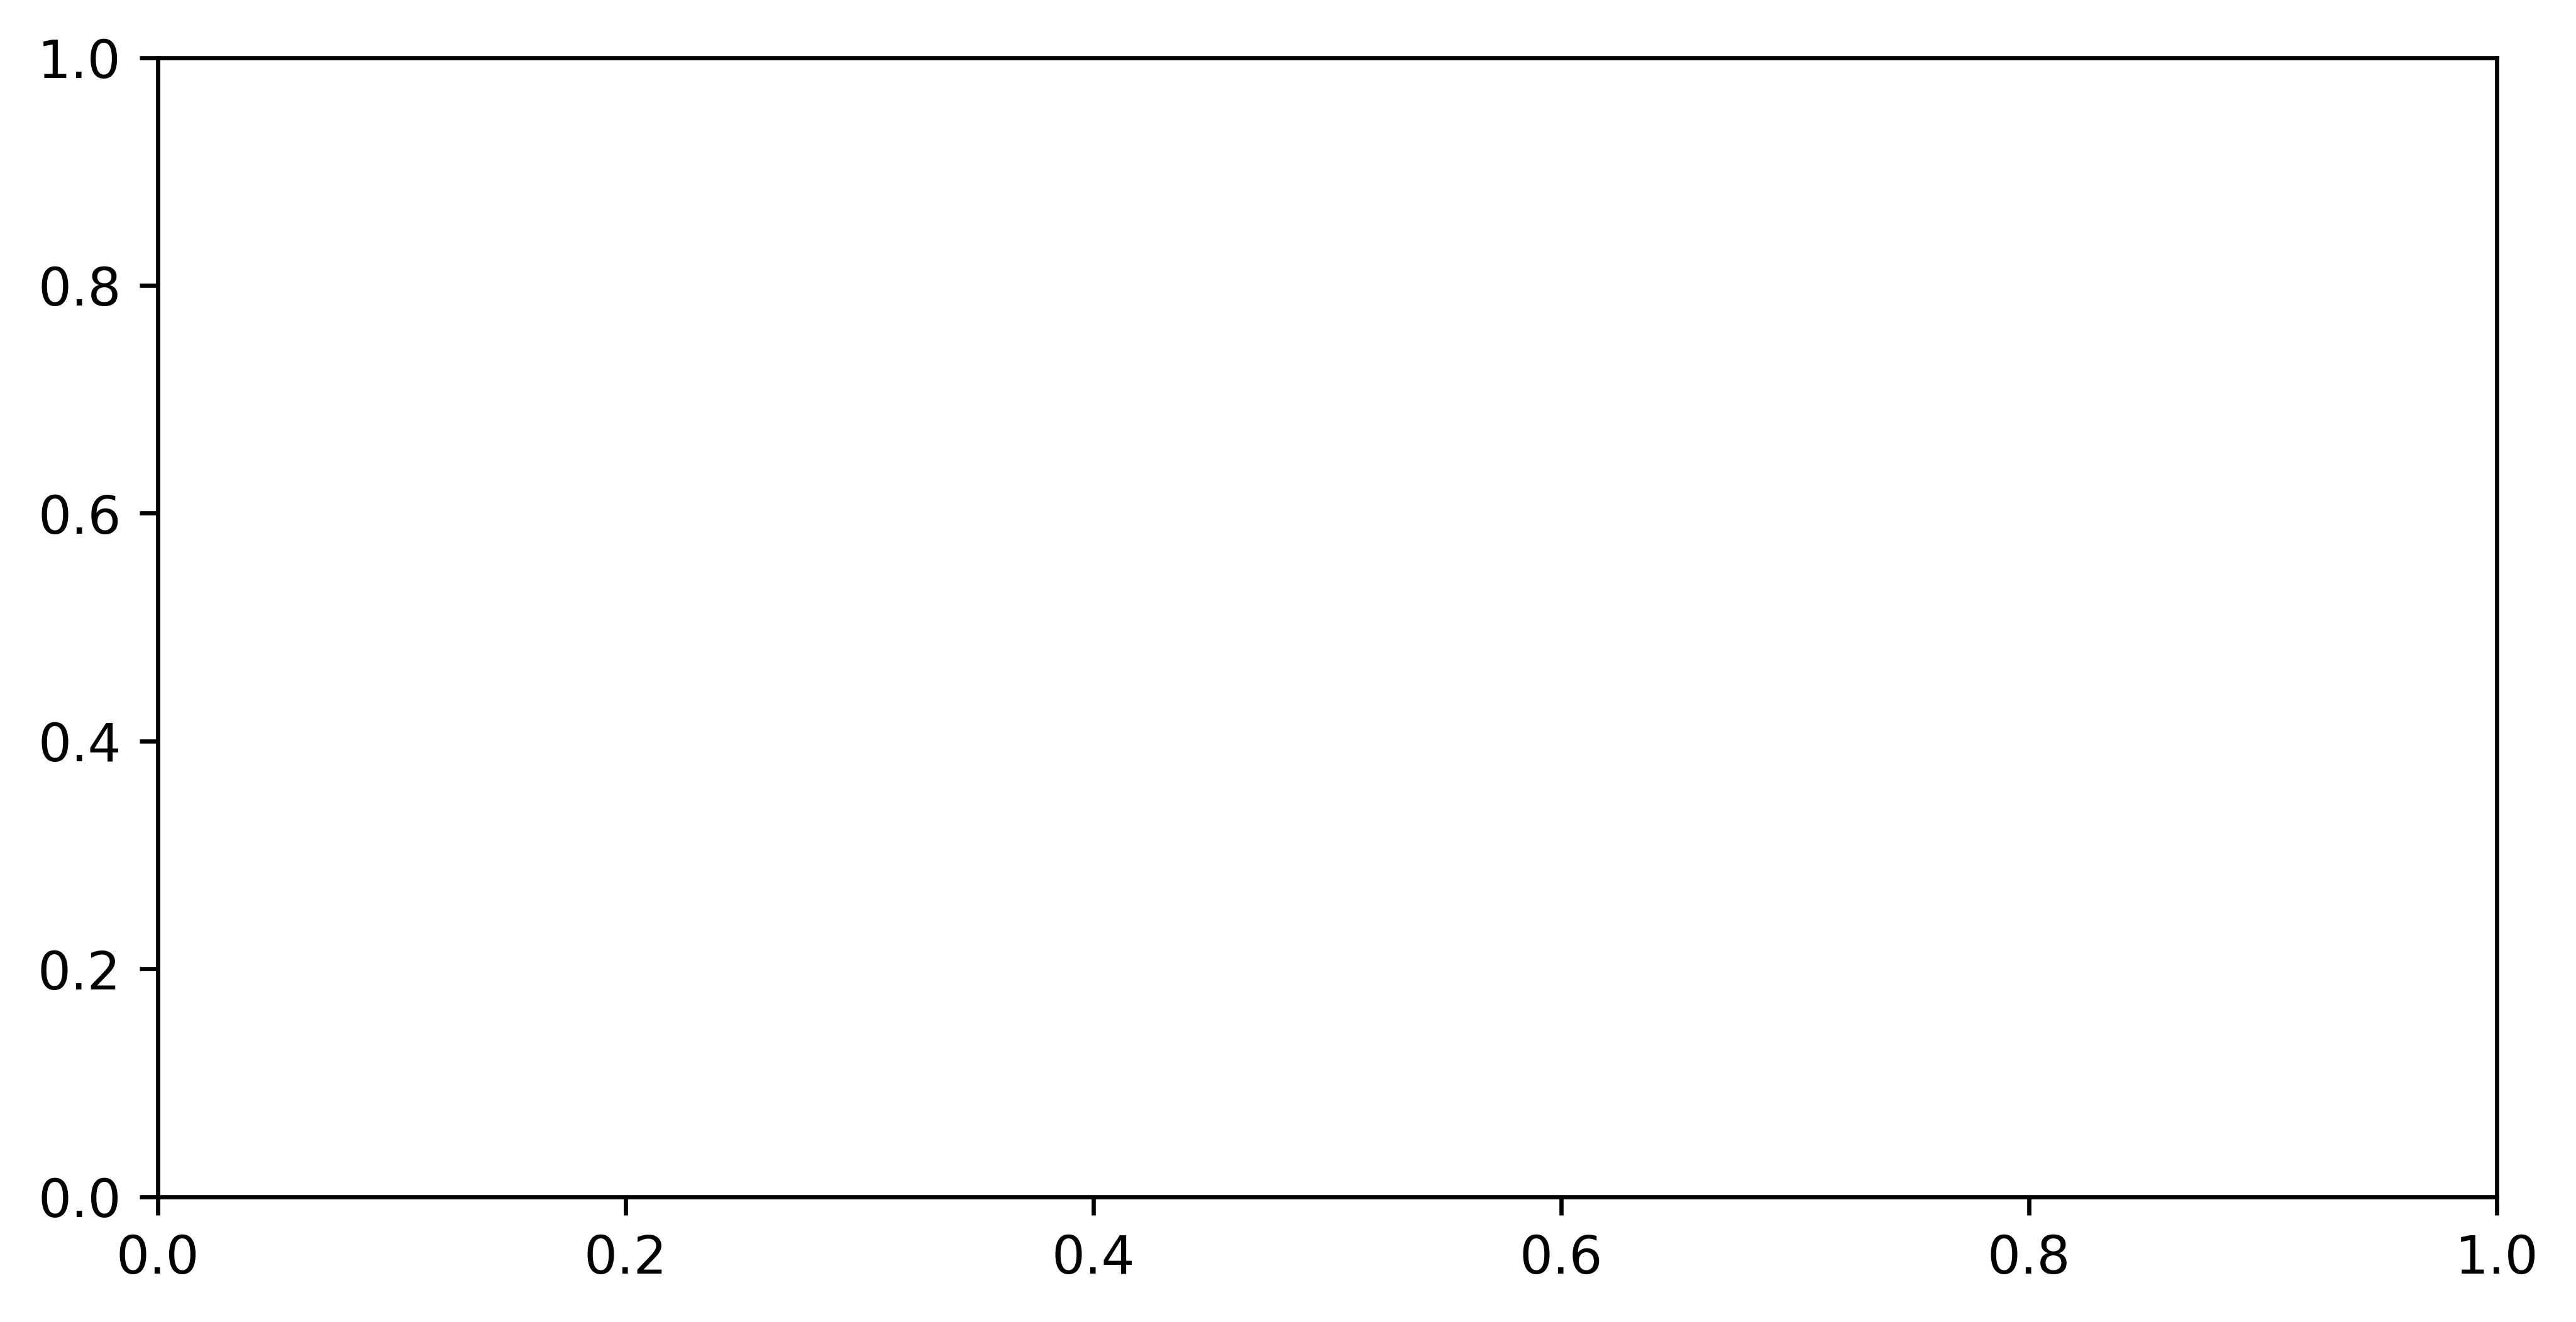

In [20]:
fig, ax = plt.subplots(figsize=(8,4), dpi=600)

#list of textures
TexNames=list(df2pair.columns.values)
#TexNames[1:]


#list of sampling methods
SamplingMethods=list(df2pair[TexNames[0]])

elem=np.arange(len(TexNames[1:]))


#for each sampling method
for i, item in enumerate(df2pair[TexNames[0]]):
    #print i
    #print item
    #Row slice from dataframe, without name
    #print list(df2pair.ix[i])[1:]
    #print np.arange(len(list(df2pair)))
    

    scatter1=ax.violinplot(list(df2pair.ix[i])[1:],[i-.25] , showmeans=True, showextrema=False, widths=.15)
    for pc in scatter1['bodies']:
        pc.set_facecolor('red')
        pc.set_edgecolor('black')
    
    
    scatter2=ax.violinplot(list(df4pair.ix[i])[1:],[i] , showmeans=True, showextrema=False, widths=.15)
    for pc in scatter2['bodies']:
        pc.set_facecolor('yellow')
        pc.set_edgecolor('black')
    
    scatter3=ax.violinplot(list(dfMaxUnique.ix[i])[1:],[i+.25] , showmeans=True, showextrema=False, widths=.15)
    for pc in scatter3['bodies']:
        pc.set_facecolor('blue')
        pc.set_edgecolor('black')
    
    


ax.legend(bbox_to_anchor=(0., 1.12, 1., .102), loc=3, ncol=3, mode="expand", borderaxespad=0.)

plt.xticks(np.arange(len(SamplingMethods)),SamplingMethods, rotation=90)
ax.plot([0, 13], [VF, VF], color='k', linestyle='-', linewidth=.5)
plt.grid()
ax.set_ylabel('Phase Fraction')
ax.set_title('Effect of Texture Combinations')

#plt.savefig("TextureCombinations.png",dpi=,orientation='portrait',bbox_inches='tight')

plt.show()